# **Task :**
## **Titanic Survival Prediction :**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the dataset

In [2]:
train_data = pd.read_csv('train(1).csv')
test_data = pd.read_csv('test(1).csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Preprocess the Training data 

In [4]:
# Age is numerical so we can use median to fill in the missing values
# Cabin and Embarked are categorical so we can use the mode to fill in the missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
train_data['Cabin'].fillna(train_data['Cabin'].mode()[0], inplace=True)

In [5]:
train_data.isna().sum().sum()

0

In [6]:
# PassengerId, Name, Ticket, Cabin are not useful for our analysis as they are unique for each passenger
# We can drop these columns
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [7]:
train_data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [8]:
# We can convert the categorical columns to numerical columns
from sklearn import preprocessing
for column in train_data.columns:
    if train_data[column].dtype == np.number:
        continue
    train_data[column] = preprocessing.LabelEncoder().fit_transform(train_data[column])

C:\Users\NSSK\AppData\Local\Temp\ipykernel_10608\2967384807.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if train_data[column].dtype == np.number:
C:\Users\NSSK\AppData\Local\Temp\ipykernel_10608\2967384807.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if train_data[column].dtype == np.number:
C:\Users\NSSK\AppData\Local\Temp\ipykernel_10608\2967384807.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if train_data[column].dtype == np.number:
C:\Users\NSSK\AppData\Local\Temp\ipykernel_10608\2967384807.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if

In [9]:
train_data.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

### Preprocessing the test data

In [10]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
# remove the columns removed from the training data
test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [12]:
#check each column for missing values
test_data.isna().sum().sum()

87

In [13]:
# we replace the missing values in the test data with the median and mode of the training data because we do not want to introduce bias
test_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)

In [14]:
test_data.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [15]:
# convert the categorical columns to numerical columns
for column in test_data.columns:
    if test_data[column].dtype == np.number:
        continue
    test_data[column] = preprocessing.LabelEncoder().fit_transform(test_data[column])

C:\Users\NSSK\AppData\Local\Temp\ipykernel_10608\4168771425.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if test_data[column].dtype == np.number:
C:\Users\NSSK\AppData\Local\Temp\ipykernel_10608\4168771425.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if test_data[column].dtype == np.number:
C:\Users\NSSK\AppData\Local\Temp\ipykernel_10608\4168771425.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if test_data[column].dtype == np.number:
C:\Users\NSSK\AppData\Local\Temp\ipykernel_10608\4168771425.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if te

In [16]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,34.5,0,0,7.8292,1
1,2,0,47.0,1,0,7.0000,2
2,1,1,62.0,0,0,9.6875,1
3,2,1,27.0,0,0,8.6625,2
4,2,0,22.0,1,1,12.2875,2


In [17]:
test_data.dtypes

Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

### Split the data into feature and target

In [18]:
#split into features and target
X_train = train_data.drop(['Survived'], axis=1)
y_train = train_data['Survived']

### Train the model

In [19]:
#train Logistic Regression model
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [20]:
predictions = LR.predict(test_data)

In [21]:
test_data.shape

(418, 7)

In [22]:
predicted_data=pd.read_csv("test(1).csv")
predicted_data["Survived"]= np.where(predictions == 0, 'No', 'Yes')

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
import numpy as np

# Plotting between factors and survival rate

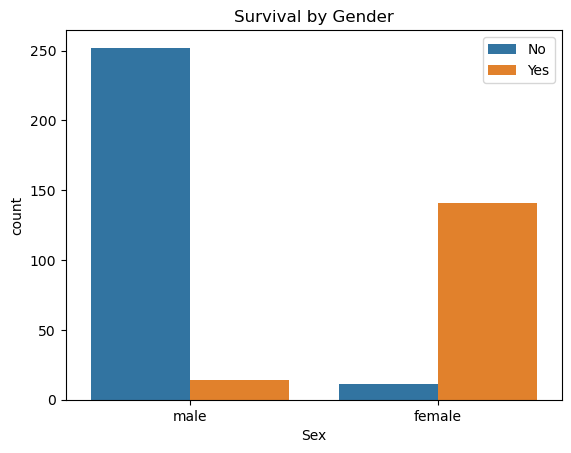

In [25]:
# Gender vs. Survival
sns.countplot(x='Sex', hue='Survived', data=predicted_data)
plt.title('Survival by Gender')
plt.legend()
plt.show()


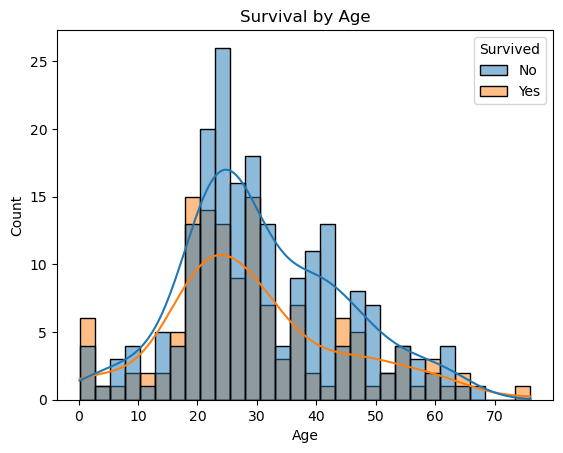

In [26]:
# Age vs. Survival
sns.histplot(x='Age', hue='Survived', data=predicted_data, bins=30, kde=True)
plt.title('Survival by Age')
plt.show()


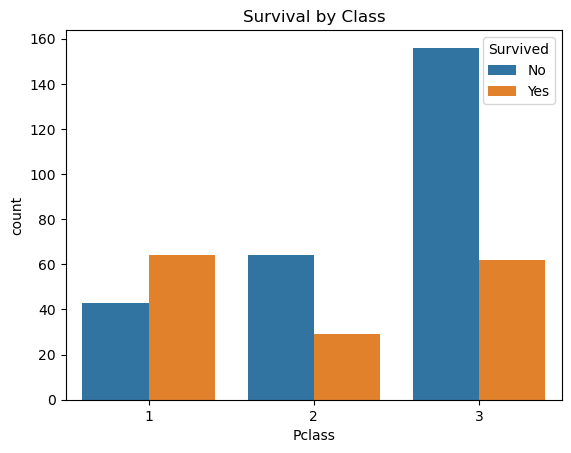

In [27]:
# Class vs. Survival
sns.countplot(x='Pclass', hue='Survived', data=predicted_data)
plt.title('Survival by Class')
plt.show()

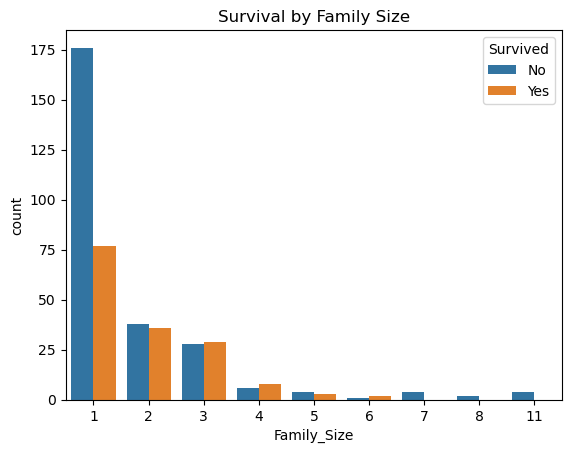

In [28]:
# Family Size vs. Survival
predicted_data['Family_Size'] = predicted_data['SibSp'] + predicted_data['Parch'] + 1
sns.countplot(x='Family_Size', hue='Survived', data=predicted_data)
plt.title('Survival by Family Size')
plt.show()

# Thank you